Ref:
https://www.kaggle.com/chahat1/data-science-london-classification

In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('../data/kaggle/train.csv',header = None)
train_labels = pd.read_csv('../data/kaggle/trainLabels.csv',header = None)
test_data =  pd.read_csv('../data/kaggle/test.csv',header = None)

In [2]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [3]:
train_data.shape,test_data.shape,train_labels.shape

((1000, 40), (9000, 40), (1000, 1))

### PRE-PROCESSING

Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data,train_labels, test_size = 0.30, random_state = 101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 40), (300, 40), (700, 1), (300, 1))

### CLASSIFICATION

In [7]:
# NAIBE BAYES
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train.values.ravel())
predicted= model.predict(x_test)
print('Naive Bayes',accuracy_score(y_test, predicted))

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train.values.ravel())
predicted= knn_model.predict(x_test)
print('KNN',accuracy_score(y_test, predicted))

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 99)
rfc_model.fit(x_train,y_train.values.ravel())
predicted = rfc_model.predict(x_test)
print('Random Forest',accuracy_score(y_test,predicted))

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'saga')
lr_model.fit(x_train,y_train.values.ravel())
lr_predicted = lr_model.predict(x_test)
print('Logistic Regression',accuracy_score(y_test, lr_predicted))

#SVM
from sklearn.svm import SVC

svc_model = SVC(gamma = 'auto')
svc_model.fit(x_train,y_train.values.ravel())
svc_predicted = svc_model.predict(x_test)
print('SVM',accuracy_score(y_test, svc_predicted))

#DECISON TREE
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train,y_train.values.ravel())
dtree_predicted = dtree_model.predict(x_test)
print('Decision Tree',accuracy_score(y_test, dtree_predicted))

#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train.values.ravel())
xgb_predicted = xgb.predict(x_test)
print('XGBoost',accuracy_score(y_test, xgb_predicted))

Naive Bayes 0.8066666666666666
KNN 0.9166666666666666
Random Forest 0.86
Logistic Regression 0.82
SVM 0.9033333333333333
Decision Tree 0.7366666666666667
XGBoost 0.87


### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler, Normalizer

norm = Normalizer()
#x_norm_train = norm.fit_transform(x_train)
#x_norm_test = norm.transform(x_test)
norm_train_data = norm.fit_transform(train_data)

In [9]:
# NAIBE BAYES
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
#nb_model.fit(x_norm_train,y_train.values.ravel())
#nb_predicted= nb_model.predict(x_norm_test)
#print('Naive Bayes',accuracy_score(y_test, nb_predicted))
print('Naive Bayes',cross_val_score(nb_model,norm_train_data, train_labels.values.ravel(), cv=10).mean())

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
#knn_model.fit(x_norm_train,y_train.values.ravel())
#knn_predicted= knn_model.predict(x_norm_test)
#print('KNN',accuracy_score(y_test, knn_predicted))
print('KNN',cross_val_score(knn_model,norm_train_data, train_labels.values.ravel(), cv=10).mean())

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 99)
#rfc_model.fit(x_norm_train,y_train.values.ravel())
#rfc_predicted = rfc_model.predict(x_norm_test)
#print('Random Forest',accuracy_score(y_test,rfc_predicted))
print('Random Forest',cross_val_score(rfc_model,norm_train_data, train_labels.values.ravel(), cv=10).mean())

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'saga')
#lr_model.fit(x_norm_train,y_train.values.ravel())
#lr_predicted = lr_model.predict(x_norm_test)
#print('Logistic Regression',accuracy_score(y_test, lr_predicted))
print('Logistic Regression',cross_val_score(lr_model,norm_train_data, train_labels.values.ravel(), cv=10).mean())

#SVM
from sklearn.svm import SVC

svc_model = SVC(gamma = 'auto')
#svc_model.fit(x_norm_train,y_train.values.ravel())
#svc_predicted = svc_model.predict(x_norm_test)
#print('SVM',accuracy_score(y_test, svc_predicted))
print('SVM',cross_val_score(svc_model,norm_train_data, train_labels.values.ravel(), cv=10).mean())

#DECISON TREE
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
#dtree_model.fit(x_norm_train,y_train.values.ravel())
#dtree_predicted = dtree_model.predict(x_norm_test)
#print('Decision Tree',accuracy_score(y_test, dtree_predicted))
print('Decision Tree',cross_val_score(dtree_model,norm_train_data, train_labels.values.ravel(), cv=10).mean())

#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
#xgb.fit(x_norm_train,y_train.values.ravel())
#xgb_predicted = xgb.predict(x_norm_test)
#print('XGBoost',accuracy_score(y_test, xgb_predicted))
print('XGBoost',cross_val_score(xgb,norm_train_data, train_labels.values.ravel(), cv=10).mean())

Naive Bayes 0.808
KNN 0.9019999999999999
Random Forest 0.8699999999999999
Logistic Regression 0.8220000000000001
SVM 0.808
Decision Tree 0.8019999999999999
XGBoost 0.8710000000000001


KNN gave maximum accuracy using Feature Scaling.

### Principal Component Analysis

In [10]:
from sklearn.decomposition import PCA

pca  = PCA(n_components=12)
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)
pca_train_data = pca.fit_transform(train_data)
explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[0.25054403 0.2055048  0.08026473 0.05033658 0.0489595  0.04489903
 0.0417078  0.03127934 0.02309797 0.02099976 0.0161938  0.0126814 ]


In [11]:
pca_train_data.shape

(1000, 12)

In [12]:
# NAIBE BAYES
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
#nb_model.fit(pca_train_data,y_train.values.ravel())
#nb_predicted= nb_model.predict(x_norm_test)
#print('Naive Bayes',accuracy_score(y_test, nb_predicted))
print('Naive Bayes',cross_val_score(nb_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
#knn_model.fit(pca_train_data,y_train.values.ravel())
#knn_predicted= knn_model.predict(x_norm_test)
#print('KNN',accuracy_score(y_test, knn_predicted))
print('KNN',cross_val_score(knn_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 99)
#rfc_model.fit(pca_train_data,y_train.values.ravel())
#rfc_predicted = rfc_model.predict(x_norm_test)
#print('Random Forest',accuracy_score(y_test,rfc_predicted))
print('Random Forest',cross_val_score(rfc_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'saga')
#lr_model.fit(pca_train_data,y_train.values.ravel())
#lr_predicted = lr_model.predict(x_norm_test)
#print('Logistic Regression',accuracy_score(y_test, lr_predicted))
print('Logistic Regression',cross_val_score(lr_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#SVM
from sklearn.svm import SVC

svc_model = SVC(gamma = 'auto')
#svc_model.fit(x_norm_train,y_train.values.ravel())
#svc_predicted = svc_model.predict(x_norm_test)
#print('SVM',accuracy_score(y_test, svc_predicted))
print('SVM',cross_val_score(svc_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#DECISON TREE

from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
#dtree_model.fit(x_norm_train,y_train.values.ravel())
#dtree_predicted = dtree_model.predict(x_norm_test)
#print('Decision Tree',accuracy_score(y_test, dtree_predicted))
print('Decision Tree',cross_val_score(dtree_model,pca_train_data, train_labels.values.ravel(), cv=10).mean())

#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
#xgb.fit(x_norm_train,y_train.values.ravel())
#xgb_predicted = xgb.predict(x_norm_test)
#print('XGBoost',accuracy_score(y_test, xgb_predicted))
print('XGBoost',cross_val_score(xgb,pca_train_data, train_labels.values.ravel(), cv=10).mean())

Naive Bayes 0.841
KNN 0.9109999999999999
Random Forest 0.9049999999999999
Logistic Regression 0.826
SVM 0.9040000000000001
Decision Tree 0.7929999999999999
XGBoost 0.876


**KNN**, **Random Forest** and **SVM** gave maximum accuracy using Principal Component Analysis.

### Applying Gaussian Mixture and Grid Search to improve the accuracy

We select the above three algorithms (KNN, Random Forest and SVM) which gave maximum accuracy for further analysis

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC

x_all = np.r_[train_data,test_data]
print('x_all shape :',x_all.shape)

# USING THE GAUSSIAN MIXTURE MODEL 
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
best_gmm.fit(x_all)
gmm_train = best_gmm.predict_proba(train_data)
gmm_test = best_gmm.predict_proba(test_data)


#Random Forest Classifier
rfc = RandomForestClassifier(random_state=99)

#USING GRID SEARCH
n_estimators = [10, 50, 100, 200,400]
max_depth = [3, 10, 20, 40]
param_grid = dict(n_estimators=n_estimators,max_depth=max_depth)

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 10,scoring='accuracy',n_jobs=-1).fit(gmm_train, train_labels.values.ravel())
rfc_best = grid_search_rfc.best_estimator_
print('Random Forest Best Score',grid_search_rfc.best_score_)
print('Random Forest Best Parmas',grid_search_rfc.best_params_)
print('Random Forest Accuracy',cross_val_score(rfc_best,gmm_train, train_labels.values.ravel(), cv=10).mean())

#KNN 
knn = KNeighborsClassifier()

#USING GRID SEARCH
n_neighbors=[3,5,6,7,8,9,10]
param_grid = dict(n_neighbors=n_neighbors)

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy').fit(gmm_train,train_labels.values.ravel())
knn_best = grid_search_knn.best_estimator_
print('KNN Best Score', grid_search_knn.best_score_)
print('KNN Best Params',grid_search_knn.best_params_)
print('KNN Accuracy',cross_val_score(knn_best,gmm_train, train_labels.values.ravel(), cv=10).mean())

#SVM
svc = SVC()

#USING GRID SEARCH
parameters = [{'kernel':['linear'],'C':[1,10,100]},
              {'kernel':['rbf'],'C':[1,10,100],'gamma':[0.05,0.0001,0.01,0.001]}]
grid_search_svm = GridSearchCV(estimator=svc, param_grid=parameters, cv = 10, n_jobs=-1,scoring='accuracy').fit(gmm_train, train_labels.values.ravel())
svm_best = grid_search_svm.best_estimator_
print('SVM Best Score',grid_search_svm.best_score_)
print('SVM Best Params',grid_search_svm.best_params_)
print('SVM Accuracy',cross_val_score(svm_best,gmm_train, train_labels.values.ravel(), cv=10).mean())

x_all shape : (10000, 40)
Random Forest Best Score 0.996
Random Forest Best Parmas {'max_depth': 3, 'n_estimators': 10}
Random Forest Accuracy 0.9960000000000001
KNN Best Score 0.996
KNN Best Params {'n_neighbors': 3}
KNN Accuracy 0.9960000000000001
SVM Best Score 0.996
SVM Best Params {'C': 1, 'kernel': 'linear'}
SVM Accuracy 0.9960000000000001


In [14]:
rfc_best.fit(gmm_train,train_labels.values.ravel())
pred  = rfc_best.predict(gmm_test)
rfc_best_pred = pd.DataFrame(pred)

rfc_best_pred.index += 1

rfc_best_pred.columns = ['Solution']
rfc_best_pred['Id'] = np.arange(1,rfc_best_pred.shape[0]+1)
rfc_best_pred = rfc_best_pred[['Id', 'Solution']]

rfc_best_pred.to_csv('../data/kaggle/Submission.csv',index=False)

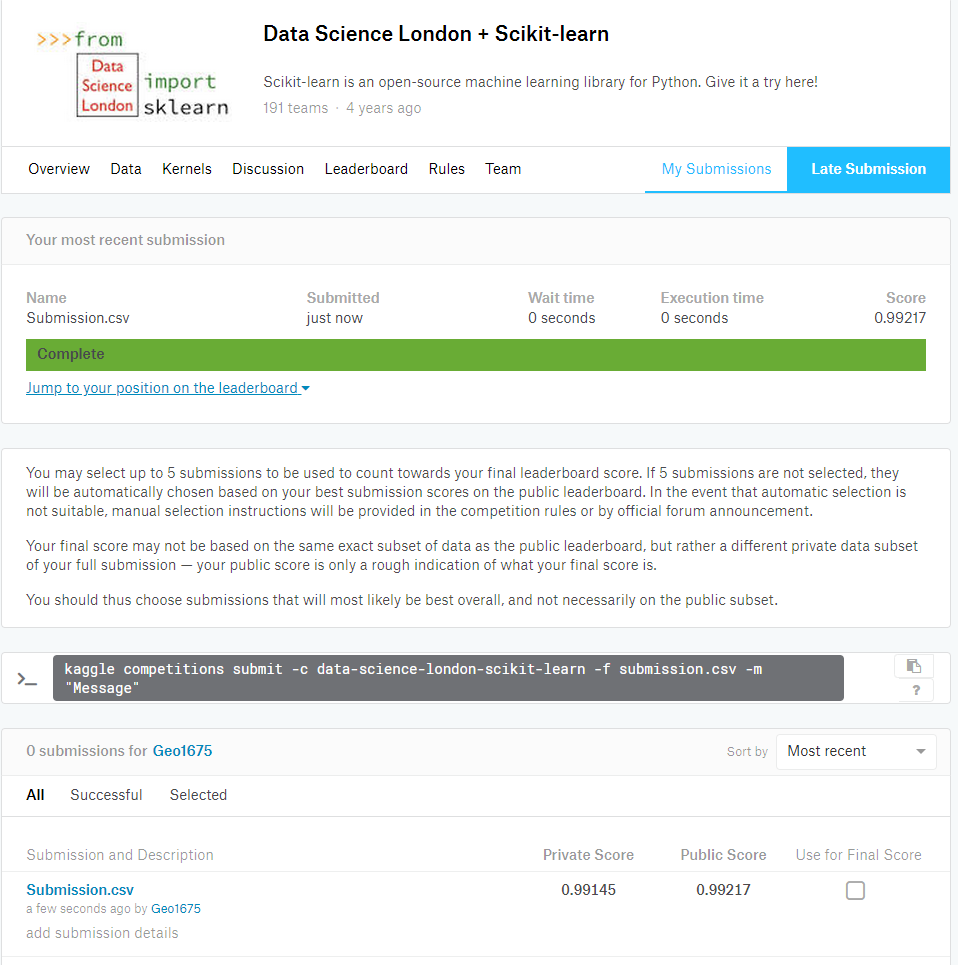